# NMF Practical Work

**Roland Badeau - Notebook code by Umut Simsekli** 

Telecom Paris - TSIA 206

DUCOTTET, MERCIER REMI

In [2]:
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display as ipd

# Librosa for audio
import librosa
# # And the display module for visualization
import librosa.display


C:\Users\lepc-remi\AppData\Local\Temp\ipykernel_21716\1574094465.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  ms.use('seaborn-muted')


<Figure size 640x480 with 0 Axes>

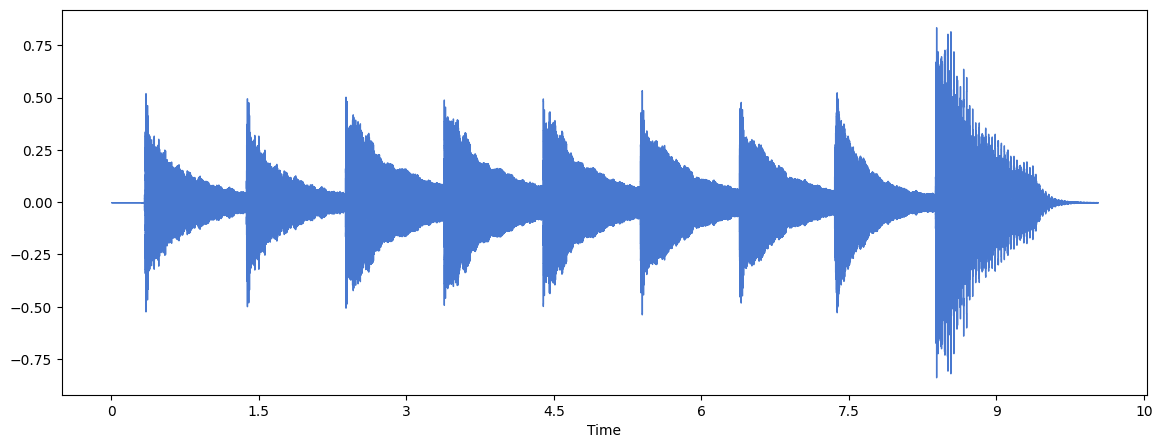

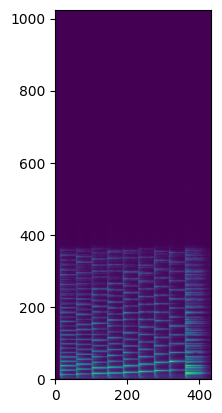

In [3]:
# Audio file
fname = 'Cmajor_piano8khz.wav'

# Load signal
y, sr = librosa.load(fname)

# Compute STFT
Xstft = librosa.stft(y, n_fft=2048, hop_length=512, win_length=None)
X = np.abs(Xstft)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

#Visualize the spectrum
plt.figure()
plt.imshow(X**0.3)
plt.gca().invert_yaxis()


![Preuve de l'équation](image_preuve.png)

'[Preuve' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
y_hat = librosa.istft(Xstft)
ipd.Audio(y_hat, rate=sr)


In [6]:
## CHOSE K ACCORDING TO THE NUMBER OF FREQUENCE

K = 8

I,J = np.shape(X)
W = np.random.rand(I,K)
H = np.random.rand(K,J)
X_hat = W@H

def update (W,X,beta,H):
    X_hat = W @ H
    W = np.divide(np.multiply(W, np.multiply(X, np.power(X_hat,beta-2))@H.T),np.power(X_hat, beta-1)@H.T) + 1e-12
    H = np.divide(np.multiply(H, W.T@np.multiply(X, np.power(X_hat,beta-2))),W.T@np.power(X_hat, beta-1)) + 1e-12
    return W,H


In [9]:
beta = 1.5
for i in range (100):
    W,H = update (W,X,beta,H)

notes = []
notesi = []

for j in range (K):
    Wj=W[:,j]
    Hj=H[j,:]
    X_hat = W@H
    note = Wj.reshape(-1,1) @ Hj.reshape(1,-1) / X_hat * X
    notes.append(note)
    notesi.append(librosa.istft(note))



ipd.Audio(librosa.istft(notes[1]), rate=sr)


In [10]:
ipd.Audio(librosa.istft(notes[1]), rate=sr)
